# Movie Recommendation System Using Collborative Filtering Method.

In [118]:
#Importing Libraries
from math import sqrt            # python library for math function
import numpy as np               # Python library for numerical computation
import pandas as pd              # Python library for data
import scipy as sp               # Python library for numerical algorithms
from matplotlib import pyplot    # Python library for plotting data
import seaborn as sns            # Python library based on matplotlib 

In [119]:
# Reading ratings file
data_ratings = pd.read_csv('RatingD.csv')
data_ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.500,1260759144
1,1,1029,3.000,1260759179
2,1,1061,3.000,1260759182
3,1,1129,2.000,1260759185
4,1,1172,4.000,1260759205


In [120]:
print(data_ratings)

        userId  movieId  rating   timestamp
0            1       31   2.500  1260759144
1            1     1029   3.000  1260759179
2            1     1061   3.000  1260759182
3            1     1129   2.000  1260759185
4            1     1172   4.000  1260759205
...        ...      ...     ...         ...
99999      671     6268   2.500  1065579370
100000     671     6269   4.000  1065149201
100001     671     6365   4.000  1070940363
100002     671     6385   2.500  1070979663
100003     671     6565   3.500  1074784724

[100004 rows x 4 columns]


In [121]:
# Reading movies file
data_movies = pd.read_csv('MovieD.csv')
data_movies.head()

,movieId,title,genres
0,1,"American President, The (1995)",Comedy|Drama|Romance
1,2,Dracula: Dead and Loving It (1995),Comedy|Horror
2,3,Balto (1995),Adventure|Animation|Children
3,4,Nixon (1995),Drama
4,5,Cutthroat Island (1995),Action|Adventure|Romance


In [122]:
print(data_movies)

       movieId                               title  \
0            1      American President, The (1995)   
1            2  Dracula: Dead and Loving It (1995)   
2            3                        Balto (1995)   
3            4                        Nixon (1995)   
4            5             Cutthroat Island (1995)   
...        ...                                 ...   
27273   131254        Kein Bund für's Leben (2007)   
27274   131256       Feuer, Eis & Dosenbier (2002)   
27275   131258                  The Pirates (2014)   
27276   131260                 Rentun Ruusu (2001)   
27277   131262                    Innocence (2014)   

                             genres  
0              Comedy|Drama|Romance  
1                     Comedy|Horror  
2      Adventure|Animation|Children  
3                             Drama  
4          Action|Adventure|Romance  
...                             ...  
27273                        Comedy  
27274                        Comedy  
27275    

In [123]:
#merge both the files
data = pd.merge(data_ratings,data_movies,on='movieId')
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.500,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.000,851868750,Dangerous Minds (1995),Drama
2,31,31,4.000,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.000,834828440,Dangerous Minds (1995),Drama
4,36,31,3.000,847057202,Dangerous Minds (1995),Drama


In [124]:
#Below code is combine movie rating and count total ratings for movies.
Movie_ratingcombination = data.dropna(axis = 0, subset = ['title'])
CountMovie_rating = (Movie_ratingcombination.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRating'})
     [['title', 'totalRating']]
    )
CountMovie_rating.head()

,title,totalRating
0,$9.99 (2008),3
1,'Hellboy': The Seeds of Creation (2004),1
2,'Neath the Arizona Skies (1934),1
3,'Round Midnight (1986),2
4,'Salem's Lot (2004),1


In [125]:
#Below code is merge movie rating with totalmovie rating count. 
rating_with_totalRating = Movie_ratingcombination.merge(CountMovie_rating, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRating.head()

,userId,movieId,rating,timestamp,title,genres,totalRating
0,1,31,2.500,1260759144,Dangerous Minds (1995),Drama,42
1,7,31,3.000,851868750,Dangerous Minds (1995),Drama,42
2,31,31,4.000,1273541953,Dangerous Minds (1995),Drama,42
3,32,31,4.000,834828440,Dangerous Minds (1995),Drama,42
4,36,31,3.000,847057202,Dangerous Minds (1995),Drama,42


In [126]:
#Indivudauly count totle rating of movies.
Total_Count=data.groupby('title')['rating'].count()
Total_Count.tail()

title
loudQUIETloud: A Film About the Pixies (2006)     1
xXx (2002)                                       23
xXx: State of the Union (2005)                    1
¡Three Amigos! (1986)                            31
À nous la liberté (Freedom for Us) (1931)         1
Name: rating, dtype: int64

In [127]:
#Below code is display all the things ot totalrating.
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(CountMovie_rating['totalRating'].describe())

count   8792.000
mean      11.299
std       24.363
min        1.000
25%        1.000
50%        3.000
75%       10.000
max      341.000
Name: totalRating, dtype: float64


In [128]:
#Below code is calculate the Average Rating of the movie dataset
Avg_movierating = data
Avg_movierating= Avg_movierating.groupby('title')['rating'].mean()
Avg_movierating


title
$9.99 (2008)                                    3.833
'Hellboy': The Seeds of Creation (2004)         2.000
'Neath the Arizona Skies (1934)                 0.500
'Round Midnight (1986)                          2.250
'Salem's Lot (2004)                             3.500
                                                 ... 
loudQUIETloud: A Film About the Pixies (2006)   4.500
xXx (2002)                                      2.478
xXx: State of the Union (2005)                  1.000
¡Three Amigos! (1986)                           3.258
À nous la liberté (Freedom for Us) (1931)       4.500
Name: rating, Length: 8792, dtype: float64

In [129]:
# Sort the average rating
sorted_movierating = Avg_movierating.sort_values(ascending=False)
sorted_movierating

title
Au Hasard Balthazar (1966)                           5.000
Edge of Heaven, The (Auf der anderen Seite) (2007)   5.000
Thief of Bagdad, The (1924)                          5.000
Mike's Murder (1984)                                 5.000
Mildred Pierce (2011)                                5.000
                                                      ... 
Green Ray, The (Rayon vert, Le) (1986)               0.500
Daddy Day Camp (2007)                                0.500
Manos: The Hands of Fate (1966)                      0.500
Mitchell (1975)                                      0.500
Disaster Movie (2008)                                0.500
Name: rating, Length: 8792, dtype: float64

In [130]:
#Create new dataset for average rating dataset.
new = pd.DataFrame()
new['average rating']=Avg_rating

In [131]:
new.columns

Index(['average rating'], dtype='object')

In [132]:
#load the new dataset.
new['count of rating']=Total_Count
new.head()

,average rating,count of rating
title,,
$9.99 (2008),3.833,3
'Hellboy': The Seeds of Creation (2004),2.000,1
'Neath the Arizona Skies (1934),0.500,1
'Round Midnight (1986),2.250,2
'Salem's Lot (2004),3.500,1


# Visualization

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
import missingno as msno         

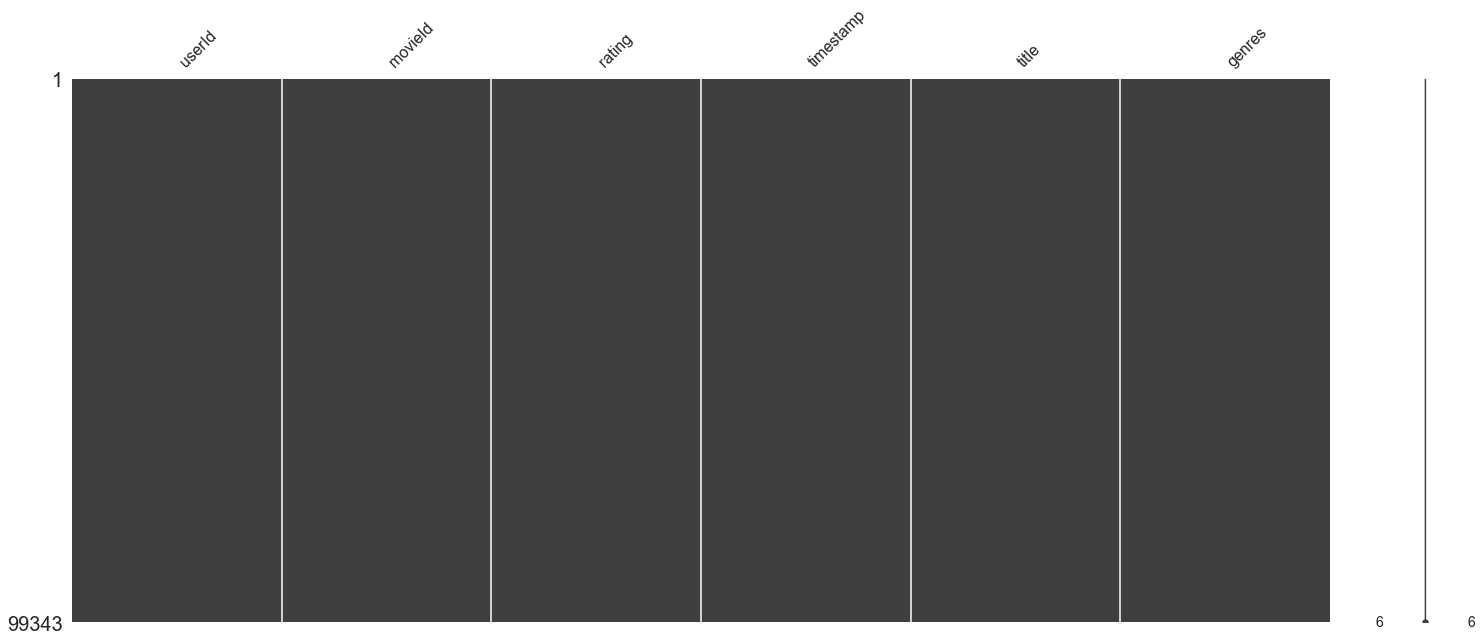

In [134]:
msno.matrix(data)

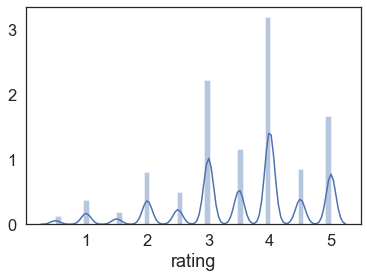

In [135]:
#plot rating graph.
sns.distplot(data["rating"]);

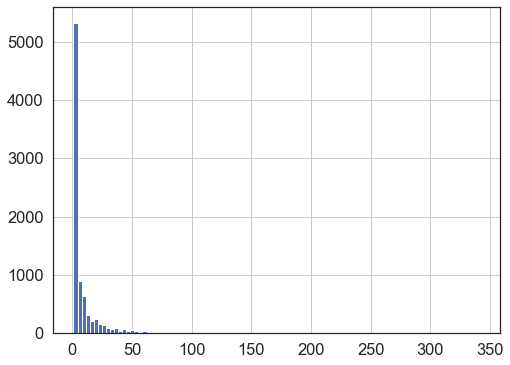

In [136]:
# plot total rating count.
plt.figure(figsize=(8,6))
new['count of rating'].hist(bins = 100)

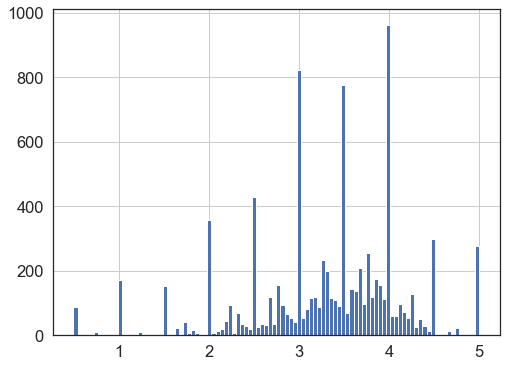

In [137]:
#Plot Average Rating Graph. 
plt.figure(figsize=(8,6))
new['average rating'].hist(bins = 100)

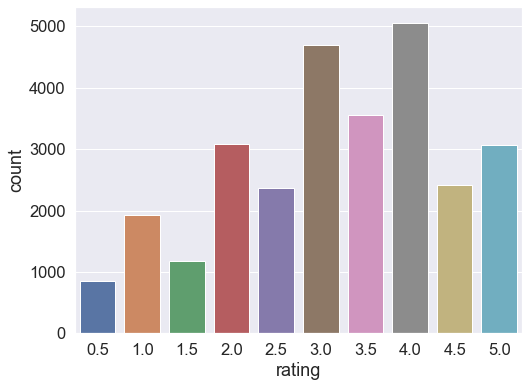

In [138]:
#Plot Rating vs No of Count Graph.
Review_plot = data[["title","rating"]].drop_duplicates()
sns.set(font_scale = 1.5)
a4_dims = (8, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax = ax,x = "rating",data=Review_plot)

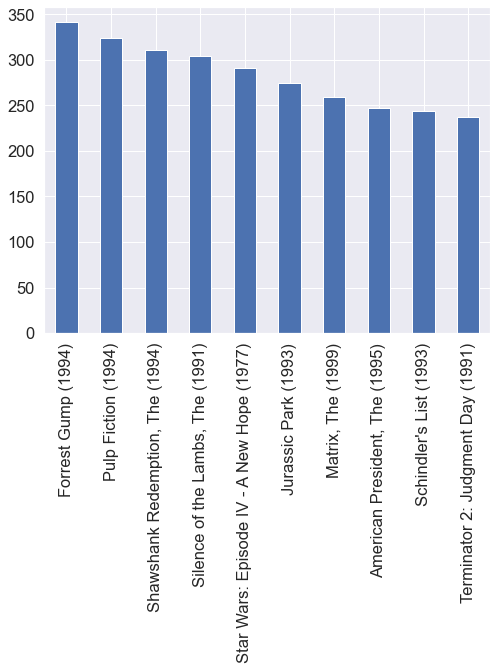

In [139]:
#Plot Movie count Data Graph.
Movie_counts = data.title.value_counts()
Movie_counts[:10].plot(kind='bar',figsize=(8,6))

# KNN Algorithm for Collaborative Filtering

In [140]:
popularity_threshold = 30 #set thresholdvalue
popular_movie= rating_with_totalRating.query('totalRating >= @popularity_threshold') #based on threshold value predict the popular movie
popular_movie.head()

,userId,movieId,rating,timestamp,title,genres,totalRating
0,1,31,2.500,1260759144,Dangerous Minds (1995),Drama,42
1,7,31,3.000,851868750,Dangerous Minds (1995),Drama,42
2,31,31,4.000,1273541953,Dangerous Minds (1995),Drama,42
3,32,31,4.000,834828440,Dangerous Minds (1995),Drama,42
4,36,31,3.000,847057202,Dangerous Minds (1995),Drama,42


In [141]:
popular_movie.shape

(58215, 7)

In [142]:
#Below code is create pivot table for feature matrix.
#A Pivot Table is used to summarise, sort, reorganise, group, count, total or average data stored in a table.
movie_features=popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000
101 Dalmatians (1996),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [143]:
#Model Train using K nearest neigbbour algorithm. 
from scipy.sparse import csr_matrix

movie_features_matrix = csr_matrix(movie_features.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [144]:
movie_features.shape

(847, 671)

In [145]:
movie_features.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000
101 Dalmatians (1996),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [146]:
#Choose random movies from the feature matrix.
q_index = np.random.choice(movie_features.shape[0])
print(q_index)
q_index =2

385


In [147]:
#Find the nearest neighbour from the distance.
distances, indices = model_knn.kneighbors(movie_features.iloc[q_index,:].values.reshape(1, -1), n_neighbors = 6)

In [148]:
#Give Recommendation of movies by using k nearest neighbour based on rating.
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features.index[q_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 101 Dalmatians (1996):

1: 101 Dalmatians (One Hundred and One Dalmatians) (1961), with distance of 0.6122321188029379:
2: Dragonheart (1996), with distance of 0.6357671086605631:
3: Space Jam (1996), with distance of 0.6498805808437947:
4: James and the Giant Peach (1996), with distance of 0.6512329095368182:
5: Nutty Professor, The (1996), with distance of 0.6709869176898213:
